In [1]:
### we will collect the stock data
### preprocess the data train and test
### create an stacked LSTM model
### predict the test data and plot the output
### predict the future 30 days and plot output

In [2]:
# !pip install pandas_datareader 

# Data Collection

In [3]:
### Data Collection
import pandas_datareader as pdr
key="96a205333c24515d19ead3019339ab99d1af15b9"

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\vatsal shingala\AppData\Roaming\Python\Python39\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-13 00:00:00+00:00,208.87,210.95,207.70,207.70,25890880,50.074292,50.572949,49.793797,49.793797,103563520,0.0,1.0
1,AAPL,2018-08-14 00:00:00+00:00,209.75,210.56,208.26,210.16,20748010,50.285262,50.479451,49.928051,50.383555,82992040,0.0,1.0
2,AAPL,2018-08-15 00:00:00+00:00,210.24,210.74,208.33,209.22,28807564,50.402734,50.522604,49.944833,50.158201,115230256,0.0,1.0
3,AAPL,2018-08-16 00:00:00+00:00,213.32,213.81,211.47,211.75,28500367,51.141131,51.258603,50.697613,50.764740,114001468,0.0,1.0
4,AAPL,2018-08-17 00:00:00+00:00,217.58,217.95,213.16,213.44,35426997,52.162419,52.251122,51.102772,51.169899,141707988,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1250,AAPL,2023-08-02 00:00:00+00:00,192.58,195.18,191.8507,195.04,50389327,192.58,195.18,191.8507,195.04,50389327,0.0,1.0
1251,AAPL,2023-08-03 00:00:00+00:00,191.17,192.37,190.6900,191.57,62243282,191.17,192.37,190.6900,191.57,62243282,0.0,1.0
1252,AAPL,2023-08-04 00:00:00+00:00,181.99,187.38,181.9200,185.52,115956841,181.99,187.38,181.9200,185.52,115956841,0.0,1.0
1253,AAPL,2023-08-07 00:00:00+00:00,178.85,183.13,177.3500,182.13,97576069,178.85,183.13,177.3500,182.13,97576069,0.0,1.0
1254,AAPL,2023-08-08 00:00:00+00:00,179.80,180.27,177.5800,179.69,67823003,179.80,180.27,177.5800,179.69,67823003,0.0,1.0


In [10]:
df1=df.reset_index()['close']
df1.shape

(1255,)

In [11]:
df1

0       208.87
1       209.75
2       210.24
3       213.32
4       217.58
         ...  
1250    192.58
1251    191.17
1252    181.99
1253    178.85
1254    179.80
Name: close, Length: 1255, dtype: float64

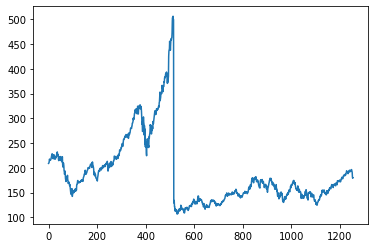

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

# Normalization

In [13]:
import numpy as np

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
print(df1)

[[0.25555416]
 [0.2577583 ]
 [0.2589856 ]
 ...
 [0.18822793]
 [0.18036318]
 [0.18274264]]


# Splitting Dataset into train and test split


In [16]:
### splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(815, 440)

In [18]:
train_data

array([[2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],
       [2.79248591e-01],
       [2.93074515e-01],
       [2.86111459e-01],
       [2.99486537e-01],
       [2.93049468e-01],
       [2.78121478e-01],
       [2.79023168e-01],
       [2.79348779e-01],
       [2.83506575e-01],
       [2.77570445e-01],
       [2.85410144e-01],
       [2.88916719e-01],
       [2.84483406e-01],
       [2.95829681e-01],
       [2.97808391e-01],
       [3.01615529e-01],
       [3.06675016e-01],
       [3.13663118e-01],
       [3.03443957e-01],
       [2.94176581e-01],
       [2.92874139e-01],


# Convert an array of values into a dataset matrix

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1): ##assume then is 101 data in dataset then loop run for 1 times
        a = dataset[i:(i+time_step), 0]#            x train       y train
        dataX.append(a)               ### i=0,  0,1,2,3-----99     100 
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #time step= 100 means it takes previous 100 days data for prediction
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(714, 100)
(714,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create LSTM model

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 285ms/step - loss: 0.0461 - val_loss: 0.0041
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0146 - val_loss: 0.0032
Epoch 3/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0106 - val_loss: 6.1772e-04
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 0.0087 - val_loss: 4.2218e-04
Epoch 5/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0078 - val_loss: 3.6873e-04
Epoch 6/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0071 - val_loss: 2.7127e-04
Epoch 7/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0068 - val_loss: 2.4574e-04
Epoch 8/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0058 - val_loss: 2.6459e-04
Epoch 9/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0054 - val_loss: 3.6965e-04
Epoch 10/100
12/12 [==============================] - 2s 147ms/

12/12 [==============================] - 4s 314ms/step - loss: 0.0013 - val_loss: 2.6371e-04
Epoch 79/100
12/12 [==============================] - 4s 305ms/step - loss: 0.0012 - val_loss: 2.2011e-04
Epoch 80/100
12/12 [==============================] - 3s 259ms/step - loss: 0.0013 - val_loss: 2.3557e-04
Epoch 81/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0012 - val_loss: 2.0696e-04
Epoch 82/100
12/12 [==============================] - 3s 263ms/step - loss: 0.0011 - val_loss: 1.9245e-04
Epoch 83/100
12/12 [==============================] - 3s 266ms/step - loss: 0.0013 - val_loss: 1.9446e-04
Epoch 84/100
12/12 [==============================] - 3s 267ms/step - loss: 0.0014 - val_loss: 1.9863e-04
Epoch 85/100
12/12 [==============================] - 3s 251ms/step - loss: 0.0013 - val_loss: 2.2602e-04
Epoch 86/100
12/12 [==============================] - 3s 237ms/step - loss: 0.0013 - val_loss: 2.1838e-04
Epoch 87/100
12/12 [==============================] - 3s 27

# Lets Do the prediction and check performance metrics

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 45ms/step


# Inverse transform the predicted values

In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# RMSE

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.1151530594678

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

164.2415496375099

# Plotting 

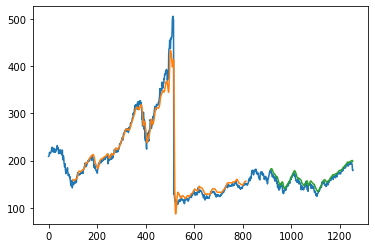

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

440

In [34]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0                       ##done 
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    
print(lst_output)

[0.21730843]
101
1 day input [0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966

9 day output [[0.23479651]]
10 day input [0.13906074 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154
 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922
 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236
 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964
 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923
 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085
 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809
 0.17635567 0.183469   0.18562304 0.18219161 0.18126487 0.17778334
 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681
 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333
 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179
 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446 0.20964308
 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024 0.21314966
 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292 0.22444584
 0.22232937 0.21475266

18 day output [[0.26990554]]
19 day input [0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183469   0.18562304
 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809 0.19273638
 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211 0.19316218
 0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.21730843 0.21350265 0.21266079
 0.21388783 0.216364

26 day output [[0.29648718]]
27 day input [0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.20771446
 0.20964308 0.21001879 0.21828428 0.21763306 0.2210645  0.21613024
 0.21314966 0.21517846 0.21735755 0.21956168 0.21635567 0.22289292
 0.22444584 0.22232937 0.21475266 0.21122104 0.18822793 0.18036318
 0.18274264 0.21730843 0.21350265 0.21266079 0.21388783 0.21636425
 0.21954192 0.22310576 0.22688887 0.230803   0.23479651 0.23883291
 0.24288246 0.2469192

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1255

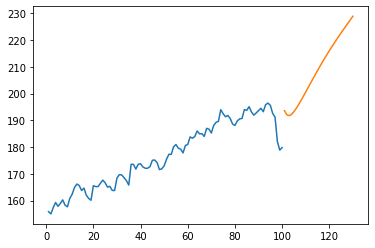

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1155:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

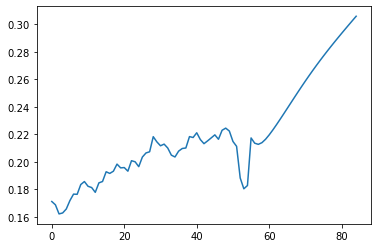

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

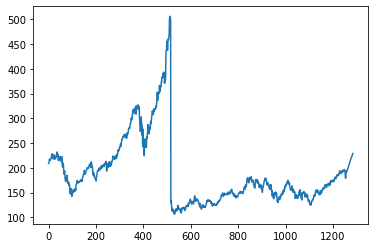

In [44]:
plt.plot(df3)